In [14]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

import os
from PIL import Image
import random


In [2]:
def resize_image(image):
    IMG_SIZE = 224
    image = tf.cast(image, tf.float32)
    image = (image/255)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image

In [5]:
full_data = []
combined_data = 'datasets/Combined Data'
three_classes = 'datasets/Tube_Effusion_Normal - 11_7_19'

data_path = three_classes
class_names = [x for x in os.listdir(data_path) if os.path.isdir(data_path + '/' + x)]
print(class_names)
class_dict = {}
for i, name in enumerate(class_names):
    class_dict[name] = i
print(class_dict)

def get_data(): 
    path = data_path
    for di in os.listdir(path):
        dirpath = path+"/"+di
        if (os.path.isdir(dirpath)):

            image_files = [x for x in os.listdir(dirpath) if (x[-4:] == "jpeg" or x[-3:] == "png" or x[-3:] == 'jpg')]

            for img in image_files:
                image = Image.open(dirpath+"/"+img)
                data = np.asarray(image)
                data = resize_image(data)
                image_tuple = np.array([data, class_dict[di]])
                full_data.append(image_tuple)


get_data()
full_data = np.array(full_data)

random.shuffle(full_data)

full_data.shape

['Tube', 'Effusion', 'Normal']
{'Tube': 0, 'Effusion': 1, 'Normal': 2}


/var/folders/84/c6fx1p654h5cgl4xrm3kgys80000gn/T/ipykernel_16033/2941472138.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  image_tuple = np.array([data, class_dict[di]])


(454, 2)

In [6]:
X_full = np.array([x[0] for x in full_data])
y_full = np.array([x[1] for x in full_data])

print(X_full[0].shape)

(224, 224, 3)


In [7]:
split = int(0.7*len(X_full))
X_train = X_full[:split]
X_test = X_full[split:]

y_train = y_full[:split]
y_test = y_full[split:]



In [8]:
from keras_cv_attention_models import beit
# Will download and load pretrained imagenet21k-ft1k weights.
mm = beit.BeitLargePatch16(input_shape=(224, 224, 3), pretrained="imagenet21k-ft1k") 

>>>> Load pretrained from: /Users/dhruv/.keras/models/beit_large_patch16_224_imagenet21k-ft1k.h5


In [9]:
mm.summary()

Model: "beit_large_patch16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 14, 14, 1024  787456      ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 reshape (Reshape)              (None, 196, 1024)    0           ['stem_conv[0][0]']              
                                                                                 

                                                                                                  
 block0_mlp_dense_2 (Dense)     (None, 197, 1024)    4195328     ['block0_mlp_gelugelu[0][0]']    
                                                                                                  
 block0_mlp_gamma (ChannelAffin  (None, 197, 1024)   1024        ['block0_mlp_dense_2[0][0]']     
 e)                                                                                               
                                                                                                  
 block0_mlp_output (Add)        (None, 197, 1024)    0           ['block0_attn_out[0][0]',        
                                                                  'block0_mlp_gamma[0][0]']       
                                                                                                  
 block1_attn_ln (LayerNormaliza  (None, 197, 1024)   2048        ['block0_mlp_output[0][0]']      
 tion)    

 block1_mlp_gamma (ChannelAffin  (None, 197, 1024)   1024        ['block1_mlp_dense_2[0][0]']     
 e)                                                                                               
                                                                                                  
 block1_mlp_output (Add)        (None, 197, 1024)    0           ['block1_attn_out[0][0]',        
                                                                  'block1_mlp_gamma[0][0]']       
                                                                                                  
 block2_attn_ln (LayerNormaliza  (None, 197, 1024)   2048        ['block1_mlp_output[0][0]']      
 tion)                                                                                            
                                                                                                  
 block2_attn_qkv (Dense)        (None, 197, 3072)    3145728     ['block2_attn_ln[0][0]']         
          

 block2_mlp_output (Add)        (None, 197, 1024)    0           ['block2_attn_out[0][0]',        
                                                                  'block2_mlp_gamma[0][0]']       
                                                                                                  
 block3_attn_ln (LayerNormaliza  (None, 197, 1024)   2048        ['block2_mlp_output[0][0]']      
 tion)                                                                                            
                                                                                                  
 block3_attn_qkv (Dense)        (None, 197, 3072)    3145728     ['block3_attn_ln[0][0]']         
                                                                                                  
 tf.reshape_15 (TFOpLambda)     (None, 197, 3072)    0           ['block3_attn_qkv[0][0]']        
                                                                                                  
 tf.split_

 block4_attn_ln (LayerNormaliza  (None, 197, 1024)   2048        ['block3_mlp_output[0][0]']      
 tion)                                                                                            
                                                                                                  
 block4_attn_qkv (Dense)        (None, 197, 3072)    3145728     ['block4_attn_ln[0][0]']         
                                                                                                  
 tf.reshape_20 (TFOpLambda)     (None, 197, 3072)    0           ['block4_attn_qkv[0][0]']        
                                                                                                  
 tf.split_4 (TFOpLambda)        [(None, 197, 1024),  0           ['tf.reshape_20[0][0]']          
                                 (None, 197, 1024),                                               
                                 (None, 197, 1024)]                                               
          

 block5_attn_qkv (Dense)        (None, 197, 3072)    3145728     ['block5_attn_ln[0][0]']         
                                                                                                  
 tf.reshape_25 (TFOpLambda)     (None, 197, 3072)    0           ['block5_attn_qkv[0][0]']        
                                                                                                  
 tf.split_5 (TFOpLambda)        [(None, 197, 1024),  0           ['tf.reshape_25[0][0]']          
                                 (None, 197, 1024),                                               
                                 (None, 197, 1024)]                                               
                                                                                                  
 block5_attn_query_bias (BiasLa  (None, 197, 1024)   1024        ['tf.split_5[0][0]']             
 yer)                                                                                             
          

                                                                                                  
 tf.split_6 (TFOpLambda)        [(None, 197, 1024),  0           ['tf.reshape_30[0][0]']          
                                 (None, 197, 1024),                                               
                                 (None, 197, 1024)]                                               
                                                                                                  
 block6_attn_query_bias (BiasLa  (None, 197, 1024)   1024        ['tf.split_6[0][0]']             
 yer)                                                                                             
                                                                                                  
 tf.reshape_31 (TFOpLambda)     (None, 197, 16, 64)  0           ['block6_attn_query_bias[0][0]'] 
                                                                                                  
 tf.compat

                                 (None, 197, 1024)]                                               
                                                                                                  
 block7_attn_query_bias (BiasLa  (None, 197, 1024)   1024        ['tf.split_7[0][0]']             
 yer)                                                                                             
                                                                                                  
 tf.reshape_36 (TFOpLambda)     (None, 197, 16, 64)  0           ['block7_attn_query_bias[0][0]'] 
                                                                                                  
 tf.compat.v1.transpose_28 (TFO  (None, 16, 197, 64)  0          ['tf.reshape_36[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 tf.reshap

 yer)                                                                                             
                                                                                                  
 tf.reshape_41 (TFOpLambda)     (None, 197, 16, 64)  0           ['block8_attn_query_bias[0][0]'] 
                                                                                                  
 tf.compat.v1.transpose_32 (TFO  (None, 16, 197, 64)  0          ['tf.reshape_41[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 tf.reshape_42 (TFOpLambda)     (None, 197, 16, 64)  0           ['tf.split_8[0][1]']             
                                                                                                  
 tf.math.multiply_8 (TFOpLambda  (None, 16, 197, 64)  0          ['tf.compat.v1.transpose_32[0][0]
 )        

                                                                                                  
 tf.compat.v1.transpose_36 (TFO  (None, 16, 197, 64)  0          ['tf.reshape_46[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 tf.reshape_47 (TFOpLambda)     (None, 197, 16, 64)  0           ['tf.split_9[0][1]']             
                                                                                                  
 tf.math.multiply_9 (TFOpLambda  (None, 16, 197, 64)  0          ['tf.compat.v1.transpose_36[0][0]
 )                                                               ']                               
                                                                                                  
 tf.compat.v1.transpose_37 (TFO  (None, 16, 64, 197)  0          ['tf.reshape_47[0][0]']          
 pLambda) 

                                                                                                  
 tf.reshape_52 (TFOpLambda)     (None, 197, 16, 64)  0           ['tf.split_10[0][1]']            
                                                                                                  
 tf.math.multiply_10 (TFOpLambd  (None, 16, 197, 64)  0          ['tf.compat.v1.transpose_40[0][0]
 a)                                                              ']                               
                                                                                                  
 tf.compat.v1.transpose_41 (TFO  (None, 16, 64, 197)  0          ['tf.reshape_52[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 lambda_20 (Lambda)             (None, 16, 197, 197  0           ['tf.math.multiply_10[0][0]',    
          

 tf.math.multiply_11 (TFOpLambd  (None, 16, 197, 64)  0          ['tf.compat.v1.transpose_44[0][0]
 a)                                                              ']                               
                                                                                                  
 tf.compat.v1.transpose_45 (TFO  (None, 16, 64, 197)  0          ['tf.reshape_57[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 lambda_22 (Lambda)             (None, 16, 197, 197  0           ['tf.math.multiply_11[0][0]',    
                                )                                 'tf.compat.v1.transpose_45[0][0]
                                                                 ']                               
                                                                                                  
 block11_a

 tf.compat.v1.transpose_49 (TFO  (None, 16, 64, 197)  0          ['tf.reshape_62[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 lambda_24 (Lambda)             (None, 16, 197, 197  0           ['tf.math.multiply_12[0][0]',    
                                )                                 'tf.compat.v1.transpose_49[0][0]
                                                                 ']                               
                                                                                                  
 block12_attn_value_bias (BiasL  (None, 197, 1024)   1024        ['tf.split_12[0][2]']            
 ayer)                                                                                            
                                                                                                  
 block12_a

 lambda_26 (Lambda)             (None, 16, 197, 197  0           ['tf.math.multiply_13[0][0]',    
                                )                                 'tf.compat.v1.transpose_53[0][0]
                                                                 ']                               
                                                                                                  
 block13_attn_value_bias (BiasL  (None, 197, 1024)   1024        ['tf.split_13[0][2]']            
 ayer)                                                                                            
                                                                                                  
 block13_attn_pos_emb (MultiHea  (None, 16, 197, 197  11712      ['lambda_26[0][0]']              
 dRelativePositionalEmbedding)  )                                                                 
                                                                                                  
 tf.reshap

                                                                                                  
 block14_attn_value_bias (BiasL  (None, 197, 1024)   1024        ['tf.split_14[0][2]']            
 ayer)                                                                                            
                                                                                                  
 block14_attn_pos_emb (MultiHea  (None, 16, 197, 197  11712      ['lambda_28[0][0]']              
 dRelativePositionalEmbedding)  )                                                                 
                                                                                                  
 tf.reshape_73 (TFOpLambda)     (None, 197, 16, 64)  0           ['block14_attn_value_bias[0][0]']
                                                                                                  
 block14_attn_attention_scores   (None, 16, 197, 197  0          ['block14_attn_pos_emb[0][0]']   
 (Softmax)

                                                                                                  
 block15_attn_pos_emb (MultiHea  (None, 16, 197, 197  11712      ['lambda_30[0][0]']              
 dRelativePositionalEmbedding)  )                                                                 
                                                                                                  
 tf.reshape_78 (TFOpLambda)     (None, 197, 16, 64)  0           ['block15_attn_value_bias[0][0]']
                                                                                                  
 block15_attn_attention_scores   (None, 16, 197, 197  0          ['block15_attn_pos_emb[0][0]']   
 (Softmax)                      )                                                                 
                                                                                                  
 tf.compat.v1.transpose_62 (TFO  (None, 16, 197, 64)  0          ['tf.reshape_78[0][0]']          
 pLambda) 

                                                                                                  
 tf.reshape_83 (TFOpLambda)     (None, 197, 16, 64)  0           ['block16_attn_value_bias[0][0]']
                                                                                                  
 block16_attn_attention_scores   (None, 16, 197, 197  0          ['block16_attn_pos_emb[0][0]']   
 (Softmax)                      )                                                                 
                                                                                                  
 tf.compat.v1.transpose_66 (TFO  (None, 16, 197, 64)  0          ['tf.reshape_83[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 lambda_33 (Lambda)             (None, 16, 197, 64)  0           ['block16_attn_attention_scores[0
          

 block17_attn_attention_scores   (None, 16, 197, 197  0          ['block17_attn_pos_emb[0][0]']   
 (Softmax)                      )                                                                 
                                                                                                  
 tf.compat.v1.transpose_70 (TFO  (None, 16, 197, 64)  0          ['tf.reshape_88[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 lambda_35 (Lambda)             (None, 16, 197, 64)  0           ['block17_attn_attention_scores[0
                                                                 ][0]',                           
                                                                  'tf.compat.v1.transpose_70[0][0]
                                                                 ']                               
          

 tf.compat.v1.transpose_74 (TFO  (None, 16, 197, 64)  0          ['tf.reshape_93[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 lambda_37 (Lambda)             (None, 16, 197, 64)  0           ['block18_attn_attention_scores[0
                                                                 ][0]',                           
                                                                  'tf.compat.v1.transpose_74[0][0]
                                                                 ']                               
                                                                                                  
 tf.compat.v1.transpose_75 (TFO  (None, 197, 16, 64)  0          ['lambda_37[0][0]']              
 pLambda)                                                                                         
          

 lambda_39 (Lambda)             (None, 16, 197, 64)  0           ['block19_attn_attention_scores[0
                                                                 ][0]',                           
                                                                  'tf.compat.v1.transpose_78[0][0]
                                                                 ']                               
                                                                                                  
 tf.compat.v1.transpose_79 (TFO  (None, 197, 16, 64)  0          ['lambda_39[0][0]']              
 pLambda)                                                                                         
                                                                                                  
 tf.reshape_99 (TFOpLambda)     (None, 197, 1024)    0           ['tf.compat.v1.transpose_79[0][0]
                                                                 ']                               
          

                                                                 ']                               
                                                                                                  
 tf.compat.v1.transpose_83 (TFO  (None, 197, 16, 64)  0          ['lambda_41[0][0]']              
 pLambda)                                                                                         
                                                                                                  
 tf.reshape_104 (TFOpLambda)    (None, 197, 1024)    0           ['tf.compat.v1.transpose_83[0][0]
                                                                 ']                               
                                                                                                  
 block20_attn_output (Dense)    (None, 197, 1024)    1049600     ['tf.reshape_104[0][0]']         
                                                                                                  
 block20_a

 pLambda)                                                                                         
                                                                                                  
 tf.reshape_109 (TFOpLambda)    (None, 197, 1024)    0           ['tf.compat.v1.transpose_87[0][0]
                                                                 ']                               
                                                                                                  
 block21_attn_output (Dense)    (None, 197, 1024)    1049600     ['tf.reshape_109[0][0]']         
                                                                                                  
 block21_attn_gamma (ChannelAff  (None, 197, 1024)   1024        ['block21_attn_output[0][0]']    
 ine)                                                                                             
                                                                                                  
 block21_a

                                                                 ']                               
                                                                                                  
 block22_attn_output (Dense)    (None, 197, 1024)    1049600     ['tf.reshape_114[0][0]']         
                                                                                                  
 block22_attn_gamma (ChannelAff  (None, 197, 1024)   1024        ['block22_attn_output[0][0]']    
 ine)                                                                                             
                                                                                                  
 block22_attn_out (Add)         (None, 197, 1024)    0           ['block21_mlp_output[0][0]',     
                                                                  'block22_attn_gamma[0][0]']     
                                                                                                  
 block22_m

                                                                                                  
 block23_attn_gamma (ChannelAff  (None, 197, 1024)   1024        ['block23_attn_output[0][0]']    
 ine)                                                                                             
                                                                                                  
 block23_attn_out (Add)         (None, 197, 1024)    0           ['block22_mlp_output[0][0]',     
                                                                  'block23_attn_gamma[0][0]']     
                                                                                                  
 block23_mlp_ln (LayerNormaliza  (None, 197, 1024)   2048        ['block23_attn_out[0][0]']       
 tion)                                                                                            
                                                                                                  
 block23_m

In [27]:
x = mm.layers[-2].output
print(x)
output = keras.layers.Dense(units=len(class_names), activation="softmax")(x)

model = keras.models.Model(inputs=mm.input, outputs=output)

for layer in model.layers[:-3]:
    layer.trainable = False

model.summary()


KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='out_ln/batchnorm/add_1:0', description="created by layer 'out_ln'")
Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 14, 14, 1024  787456      ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 reshape (Reshape)              (N

 block0_mlp_gelugelu (Activatio  (None, 197, 4096)   0           ['block0_mlp_dense_1[0][0]']     
 n)                                                                                               
                                                                                                  
 block0_mlp_dense_2 (Dense)     (None, 197, 1024)    4195328     ['block0_mlp_gelugelu[0][0]']    
                                                                                                  
 block0_mlp_gamma (ChannelAffin  (None, 197, 1024)   1024        ['block0_mlp_dense_2[0][0]']     
 e)                                                                                               
                                                                                                  
 block0_mlp_output (Add)        (None, 197, 1024)    0           ['block0_attn_out[0][0]',        
                                                                  'block0_mlp_gamma[0][0]']       
          

 block1_mlp_dense_2 (Dense)     (None, 197, 1024)    4195328     ['block1_mlp_gelugelu[0][0]']    
                                                                                                  
 block1_mlp_gamma (ChannelAffin  (None, 197, 1024)   1024        ['block1_mlp_dense_2[0][0]']     
 e)                                                                                               
                                                                                                  
 block1_mlp_output (Add)        (None, 197, 1024)    0           ['block1_attn_out[0][0]',        
                                                                  'block1_mlp_gamma[0][0]']       
                                                                                                  
 block2_attn_ln (LayerNormaliza  (None, 197, 1024)   2048        ['block1_mlp_output[0][0]']      
 tion)                                                                                            
          

 e)                                                                                               
                                                                                                  
 block2_mlp_output (Add)        (None, 197, 1024)    0           ['block2_attn_out[0][0]',        
                                                                  'block2_mlp_gamma[0][0]']       
                                                                                                  
 block3_attn_ln (LayerNormaliza  (None, 197, 1024)   2048        ['block2_mlp_output[0][0]']      
 tion)                                                                                            
                                                                                                  
 block3_attn_qkv (Dense)        (None, 197, 3072)    3145728     ['block3_attn_ln[0][0]']         
                                                                                                  
 tf.reshap

                                                                  'block3_mlp_gamma[0][0]']       
                                                                                                  
 block4_attn_ln (LayerNormaliza  (None, 197, 1024)   2048        ['block3_mlp_output[0][0]']      
 tion)                                                                                            
                                                                                                  
 block4_attn_qkv (Dense)        (None, 197, 3072)    3145728     ['block4_attn_ln[0][0]']         
                                                                                                  
 tf.reshape_20 (TFOpLambda)     (None, 197, 3072)    0           ['block4_attn_qkv[0][0]']        
                                                                                                  
 tf.split_4 (TFOpLambda)        [(None, 197, 1024),  0           ['tf.reshape_20[0][0]']          
          

 tion)                                                                                            
                                                                                                  
 block5_attn_qkv (Dense)        (None, 197, 3072)    3145728     ['block5_attn_ln[0][0]']         
                                                                                                  
 tf.reshape_25 (TFOpLambda)     (None, 197, 3072)    0           ['block5_attn_qkv[0][0]']        
                                                                                                  
 tf.split_5 (TFOpLambda)        [(None, 197, 1024),  0           ['tf.reshape_25[0][0]']          
                                 (None, 197, 1024),                                               
                                 (None, 197, 1024)]                                               
                                                                                                  
 block5_at

                                                                                                  
 tf.reshape_30 (TFOpLambda)     (None, 197, 3072)    0           ['block6_attn_qkv[0][0]']        
                                                                                                  
 tf.split_6 (TFOpLambda)        [(None, 197, 1024),  0           ['tf.reshape_30[0][0]']          
                                 (None, 197, 1024),                                               
                                 (None, 197, 1024)]                                               
                                                                                                  
 block6_attn_query_bias (BiasLa  (None, 197, 1024)   1024        ['tf.split_6[0][0]']             
 yer)                                                                                             
                                                                                                  
 tf.reshap

 tf.split_7 (TFOpLambda)        [(None, 197, 1024),  0           ['tf.reshape_35[0][0]']          
                                 (None, 197, 1024),                                               
                                 (None, 197, 1024)]                                               
                                                                                                  
 block7_attn_query_bias (BiasLa  (None, 197, 1024)   1024        ['tf.split_7[0][0]']             
 yer)                                                                                             
                                                                                                  
 tf.reshape_36 (TFOpLambda)     (None, 197, 16, 64)  0           ['block7_attn_query_bias[0][0]'] 
                                                                                                  
 tf.compat.v1.transpose_28 (TFO  (None, 16, 197, 64)  0          ['tf.reshape_36[0][0]']          
 pLambda) 

                                                                                                  
 block8_attn_query_bias (BiasLa  (None, 197, 1024)   1024        ['tf.split_8[0][0]']             
 yer)                                                                                             
                                                                                                  
 tf.reshape_41 (TFOpLambda)     (None, 197, 16, 64)  0           ['block8_attn_query_bias[0][0]'] 
                                                                                                  
 tf.compat.v1.transpose_32 (TFO  (None, 16, 197, 64)  0          ['tf.reshape_41[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 tf.reshape_42 (TFOpLambda)     (None, 197, 16, 64)  0           ['tf.split_8[0][1]']             
          

                                                                                                  
 tf.reshape_46 (TFOpLambda)     (None, 197, 16, 64)  0           ['block9_attn_query_bias[0][0]'] 
                                                                                                  
 tf.compat.v1.transpose_36 (TFO  (None, 16, 197, 64)  0          ['tf.reshape_46[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 tf.reshape_47 (TFOpLambda)     (None, 197, 16, 64)  0           ['tf.split_9[0][1]']             
                                                                                                  
 tf.math.multiply_9 (TFOpLambda  (None, 16, 197, 64)  0          ['tf.compat.v1.transpose_36[0][0]
 )                                                               ']                               
          

 tf.compat.v1.transpose_40 (TFO  (None, 16, 197, 64)  0          ['tf.reshape_51[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 tf.reshape_52 (TFOpLambda)     (None, 197, 16, 64)  0           ['tf.split_10[0][1]']            
                                                                                                  
 tf.math.multiply_10 (TFOpLambd  (None, 16, 197, 64)  0          ['tf.compat.v1.transpose_40[0][0]
 a)                                                              ']                               
                                                                                                  
 tf.compat.v1.transpose_41 (TFO  (None, 16, 64, 197)  0          ['tf.reshape_52[0][0]']          
 pLambda)                                                                                         
          

 tf.reshape_57 (TFOpLambda)     (None, 197, 16, 64)  0           ['tf.split_11[0][1]']            
                                                                                                  
 tf.math.multiply_11 (TFOpLambd  (None, 16, 197, 64)  0          ['tf.compat.v1.transpose_44[0][0]
 a)                                                              ']                               
                                                                                                  
 tf.compat.v1.transpose_45 (TFO  (None, 16, 64, 197)  0          ['tf.reshape_57[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 lambda_22 (Lambda)             (None, 16, 197, 197  0           ['tf.math.multiply_11[0][0]',    
                                )                                 'tf.compat.v1.transpose_45[0][0]
          

 a)                                                              ']                               
                                                                                                  
 tf.compat.v1.transpose_49 (TFO  (None, 16, 64, 197)  0          ['tf.reshape_62[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 lambda_24 (Lambda)             (None, 16, 197, 197  0           ['tf.math.multiply_12[0][0]',    
                                )                                 'tf.compat.v1.transpose_49[0][0]
                                                                 ']                               
                                                                                                  
 block12_attn_value_bias (BiasL  (None, 197, 1024)   1024        ['tf.split_12[0][2]']            
 ayer)    

 pLambda)                                                                                         
                                                                                                  
 lambda_26 (Lambda)             (None, 16, 197, 197  0           ['tf.math.multiply_13[0][0]',    
                                )                                 'tf.compat.v1.transpose_53[0][0]
                                                                 ']                               
                                                                                                  
 block13_attn_value_bias (BiasL  (None, 197, 1024)   1024        ['tf.split_13[0][2]']            
 ayer)                                                                                            
                                                                                                  
 block13_attn_pos_emb (MultiHea  (None, 16, 197, 197  11712      ['lambda_26[0][0]']              
 dRelative

                                )                                 'tf.compat.v1.transpose_57[0][0]
                                                                 ']                               
                                                                                                  
 block14_attn_value_bias (BiasL  (None, 197, 1024)   1024        ['tf.split_14[0][2]']            
 ayer)                                                                                            
                                                                                                  
 block14_attn_pos_emb (MultiHea  (None, 16, 197, 197  11712      ['lambda_28[0][0]']              
 dRelativePositionalEmbedding)  )                                                                 
                                                                                                  
 tf.reshape_73 (TFOpLambda)     (None, 197, 16, 64)  0           ['block14_attn_value_bias[0][0]']
          

 block15_attn_value_bias (BiasL  (None, 197, 1024)   1024        ['tf.split_15[0][2]']            
 ayer)                                                                                            
                                                                                                  
 block15_attn_pos_emb (MultiHea  (None, 16, 197, 197  11712      ['lambda_30[0][0]']              
 dRelativePositionalEmbedding)  )                                                                 
                                                                                                  
 tf.reshape_78 (TFOpLambda)     (None, 197, 16, 64)  0           ['block15_attn_value_bias[0][0]']
                                                                                                  
 block15_attn_attention_scores   (None, 16, 197, 197  0          ['block15_attn_pos_emb[0][0]']   
 (Softmax)                      )                                                                 
          

 block16_attn_pos_emb (MultiHea  (None, 16, 197, 197  11712      ['lambda_32[0][0]']              
 dRelativePositionalEmbedding)  )                                                                 
                                                                                                  
 tf.reshape_83 (TFOpLambda)     (None, 197, 16, 64)  0           ['block16_attn_value_bias[0][0]']
                                                                                                  
 block16_attn_attention_scores   (None, 16, 197, 197  0          ['block16_attn_pos_emb[0][0]']   
 (Softmax)                      )                                                                 
                                                                                                  
 tf.compat.v1.transpose_66 (TFO  (None, 16, 197, 64)  0          ['tf.reshape_83[0][0]']          
 pLambda)                                                                                         
          

 tf.reshape_88 (TFOpLambda)     (None, 197, 16, 64)  0           ['block17_attn_value_bias[0][0]']
                                                                                                  
 block17_attn_attention_scores   (None, 16, 197, 197  0          ['block17_attn_pos_emb[0][0]']   
 (Softmax)                      )                                                                 
                                                                                                  
 tf.compat.v1.transpose_70 (TFO  (None, 16, 197, 64)  0          ['tf.reshape_88[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 lambda_35 (Lambda)             (None, 16, 197, 64)  0           ['block17_attn_attention_scores[0
                                                                 ][0]',                           
          

 (Softmax)                      )                                                                 
                                                                                                  
 tf.compat.v1.transpose_74 (TFO  (None, 16, 197, 64)  0          ['tf.reshape_93[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 lambda_37 (Lambda)             (None, 16, 197, 64)  0           ['block18_attn_attention_scores[0
                                                                 ][0]',                           
                                                                  'tf.compat.v1.transpose_74[0][0]
                                                                 ']                               
                                                                                                  
 tf.compat

 pLambda)                                                                                         
                                                                                                  
 lambda_39 (Lambda)             (None, 16, 197, 64)  0           ['block19_attn_attention_scores[0
                                                                 ][0]',                           
                                                                  'tf.compat.v1.transpose_78[0][0]
                                                                 ']                               
                                                                                                  
 tf.compat.v1.transpose_79 (TFO  (None, 197, 16, 64)  0          ['lambda_39[0][0]']              
 pLambda)                                                                                         
                                                                                                  
 tf.reshap

                                                                 ][0]',                           
                                                                  'tf.compat.v1.transpose_82[0][0]
                                                                 ']                               
                                                                                                  
 tf.compat.v1.transpose_83 (TFO  (None, 197, 16, 64)  0          ['lambda_41[0][0]']              
 pLambda)                                                                                         
                                                                                                  
 tf.reshape_104 (TFOpLambda)    (None, 197, 1024)    0           ['tf.compat.v1.transpose_83[0][0]
                                                                 ']                               
                                                                                                  
 block20_a

                                                                                                  
 tf.compat.v1.transpose_87 (TFO  (None, 197, 16, 64)  0          ['lambda_43[0][0]']              
 pLambda)                                                                                         
                                                                                                  
 tf.reshape_109 (TFOpLambda)    (None, 197, 1024)    0           ['tf.compat.v1.transpose_87[0][0]
                                                                 ']                               
                                                                                                  
 block21_attn_output (Dense)    (None, 197, 1024)    1049600     ['tf.reshape_109[0][0]']         
                                                                                                  
 block21_attn_gamma (ChannelAff  (None, 197, 1024)   1024        ['block21_attn_output[0][0]']    
 ine)     

                                                                                                  
 tf.reshape_114 (TFOpLambda)    (None, 197, 1024)    0           ['tf.compat.v1.transpose_91[0][0]
                                                                 ']                               
                                                                                                  
 block22_attn_output (Dense)    (None, 197, 1024)    1049600     ['tf.reshape_114[0][0]']         
                                                                                                  
 block22_attn_gamma (ChannelAff  (None, 197, 1024)   1024        ['block22_attn_output[0][0]']    
 ine)                                                                                             
                                                                                                  
 block22_attn_out (Add)         (None, 197, 1024)    0           ['block21_mlp_output[0][0]',     
          

                                                                                                  
 block23_attn_output (Dense)    (None, 197, 1024)    1049600     ['tf.reshape_119[0][0]']         
                                                                                                  
 block23_attn_gamma (ChannelAff  (None, 197, 1024)   1024        ['block23_attn_output[0][0]']    
 ine)                                                                                             
                                                                                                  
 block23_attn_out (Add)         (None, 197, 1024)    0           ['block22_mlp_output[0][0]',     
                                                                  'block23_attn_gamma[0][0]']     
                                                                                                  
 block23_mlp_ln (LayerNormaliza  (None, 197, 1024)   2048        ['block23_attn_out[0][0]']       
 tion)    

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=4, 
                    validation_data=(X_test, y_test))

Epoch 1/4


2022-06-30 15:39:24.794791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - ETA: 0s - loss: 0.9411 - accuracy: 0.5678

2022-06-30 15:40:17.244834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 95s 8s/step - loss: 0.9411 - accuracy: 0.5678 - val_loss: 1.9388 - val_accuracy: 0.2920
Epoch 2/4
10/10 [==============================] - 71s 7s/step - loss: 0.7630 - accuracy: 0.6562 - val_loss: 1.9412 - val_accuracy: 0.2993
Epoch 3/4
10/10 [==============================] - 69s 7s/step - loss: 0.6628 - accuracy: 0.6656 - val_loss: 2.2338 - val_accuracy: 0.2920
Epoch 4/4
 9/10 [==========================>...] - ETA: 4s - loss: 0.6607 - accuracy: 0.6806

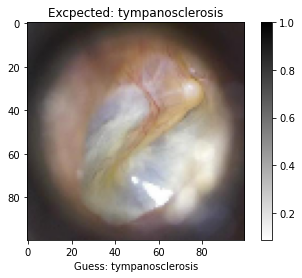

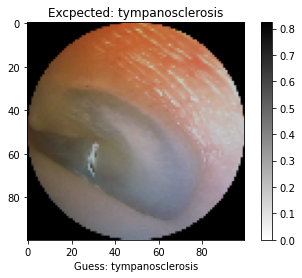

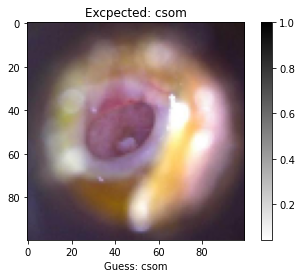

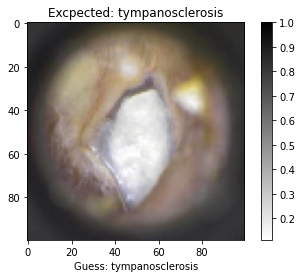

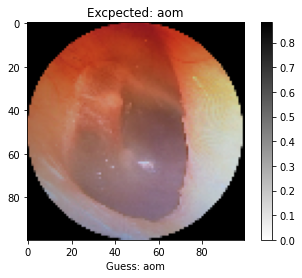

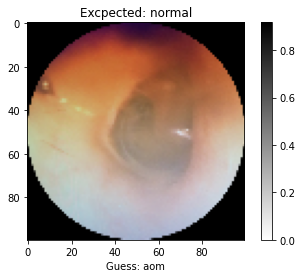

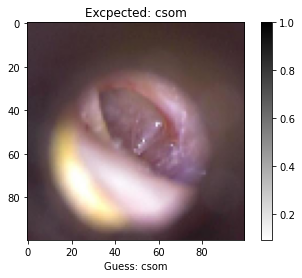

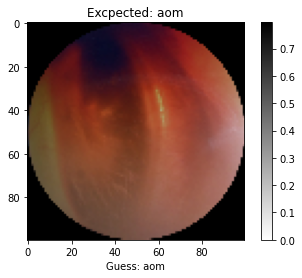

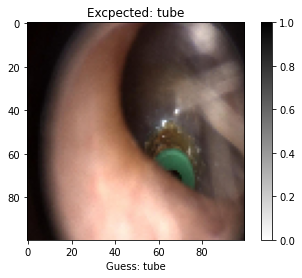

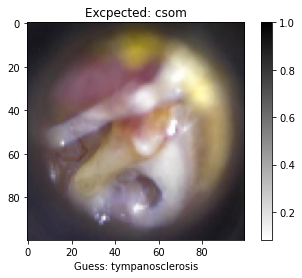

In [24]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Excpected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()

def get_number():
    while True:
        num = input("Pick a number: ")
    if num.isdigit():
        num = int(num)
        if 0 <= num <= 1000:
            return int(num)
    else:
        print("Try again...")


for num in range(0, 10):
    image = X_test[num]
    label = y_test[num]
    predict(mm, image, label)

In [90]:
model = keras.Sequential()
a = layers.Dense(2, activation="relu")
display(a)
model.add(a)
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))